# Metropolis-Hastings Algorithm

This is a first pass at implementing a Metropolis-Hastings algorithm.  

Background: Estimating a distribution is hard. Below is heavily copied from a paper: [Robert-2016: https://arxiv.org/pdf/1504.01896]


>There are many cases where "computing an integral like 
>$$ \mathcal{J}(h) = \int_\mathcal{X} h(x) d\pi(x),$$
>where $d\pi$ is a probability measure, may prove intractable, from the shape of the domain $\mathcal{X}$ to the dimension of $\mathcal{X}$ (and $x$), to the complexity of one of the functions $h$ or $π$."  
>
>Classical Monte Carlo methods face many challenges especially when attempting to reproduce a specific distribution. By using a Markov Chain in conjunction with the Monte Carlo method it is possible to address some of the issues associated with modeling a complex distribution and particularly the curse of dimensionality. \
>
>The Metropolis-Hastings Algorithm is developed from two seminal papers: Metropolis, et al. 1953, and Hastings, 1970.  Given a probability distribution $\pi$ and a state space $\mathcal{X}$, that is computable up to some multiplying constant $\pi(x) \propto \tilde{\pi}(x)$. The Metropolis-Hastings algorithm in a generic way constructs a Markov chain on $\mathcal{x}$ that is ergodic and stationary with respect to our probability measure $\pi$ -- meaning that if $X^{(t)} ~ \pi(x)$, then $X^{(t+1)} ~ \pi(x)$ successive estimates $X^{(t)} ~ \pi(x)$-- which will eventually converges in distribution to $\pi$.

The pseudocode is as follows: 

```
#### Metropolis Algorithm ####
Draw theta_0
for i = 1,2,... do
    Draw theta_star ~ N( theta_i, sigma^2) //Make a new proposal
    alpha     <- min{1, P( theta_star)/P( theta_i)} // Compute acceptance rate
    theta_i+1 <- accept: 
                    theta_star, probability = alpha
                    theta_i,    probability = 1- alpha
```

Nah Lets try it on my own with a simple gaussian distribution:Again I am pulling from another online resource: [https://blog.djnavarro.net/posts/2023-04-12_metropolis-hastings/]
This is implemented with R but I am using python.  I've copied the code in R with suitable modifications for python.  Hopefully it works in a straightforward way.  

~~Let's start with some target function:~~
$$ p(x) = \frac{\exp{(-x^2)(2 + \sin{(5x)} + \sin{(2x)})}}{\int_{-\infty}^\infty \exp{(-u^2)(2 + \sin{(5u)} + \sin{(2u)})}du}$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def nongauss_f(x):
    return np.exp(-x**2*(2+np.sin(5*x)+np.sin(2*x)))
def gauss_f(x):
    return np.exp(-x**2)
def metropolis_step(x, sigma, function):
    proposed_x = np.random.normal(x, sigma)
    alpha = min(1, function(proposed_x)/function(x)) #why does this fraction work? Base case is we draw from the center of distributions and we want more information on the curvature.  The smaller probabilties (lower values) are associated with getting more information about the smaller regions. 
    u = np.random.uniform()
    if u < alpha:
        value = proposed_x
        accepted = True
    else:
        value = x
        accepted = False
    return value, accepted
def metropolis_sampler(initial_val, function, n=1000, sigma = 1):
    results = []
    current_state = initial_val
    for i in range(0, n):
        out = metropolis_step(current_state, sigma, function)
        current_state = out[0]
        results.append(out)
    return results

In [12]:
np.random.seed(1234)
n = 1000
sigma = 12
sample = metropolis_sampler(0.1, nongauss_f, n = n,sigma=sigma)

In [13]:
data = pd.DataFrame(sample)
data.tail(15)

,0,1
985,-0.296074,False
986,-0.296074,False
987,-0.296074,False
988,-0.296074,False
989,-0.296074,False
990,-0.296074,False
991,-0.296074,False
992,-0.837378,True
993,-0.837378,False
994,-0.457193,True


In [9]:
accepted = data
#rejected = data[data[1]!=True]
xval = np.linspace(-11,11, n)
yval = nongauss_f(xval)


<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
/var/folders/cf/2c70vlmd4zb0rmx_c3fdlmx00000gn/T/ipykernel_62570/3485003854.py:9: SyntaxWarning: invalid escape sequence '\e'
  '$f(x) = \exp{[(-x^2)(2 + \sin{(5x)} + \sin{(2x))]}}$' )


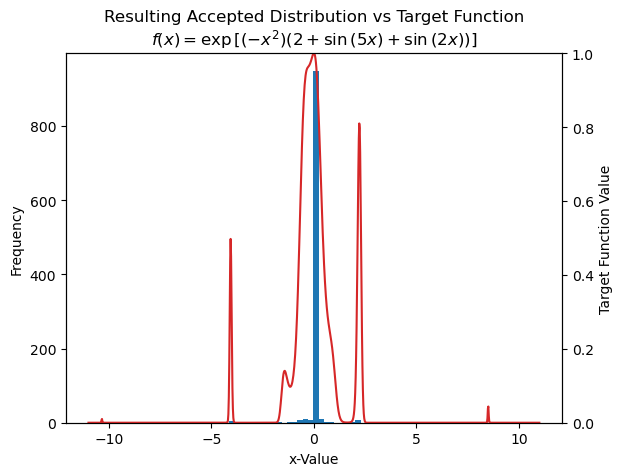

In [10]:
fig, plt1 = plt.subplots()

# First y-axis with histogram
plt1.hist(accepted[0],bins=25)
plt1.set_ylabel('Frequency')
plt1.set_xlabel('x-Value')
plt1.set_title('Resulting Accepted Distribution vs Target Function'
               '\n' 
               '$f(x) = \exp{[(-x^2)(2 + \sin{(5x)} + \sin{(2x))]}}$' )

# Second y-axis with target distribution
color = 'tab:red'
plt2 = plt1.twinx()
plt2.set_ylabel('Target Function Value')
plt2.set_ylim(0,1)
plt2.plot(xval, yval, label='Target Function', color = color)


Text(0.5, 1.0, 'Resulting Rejected Distribution')

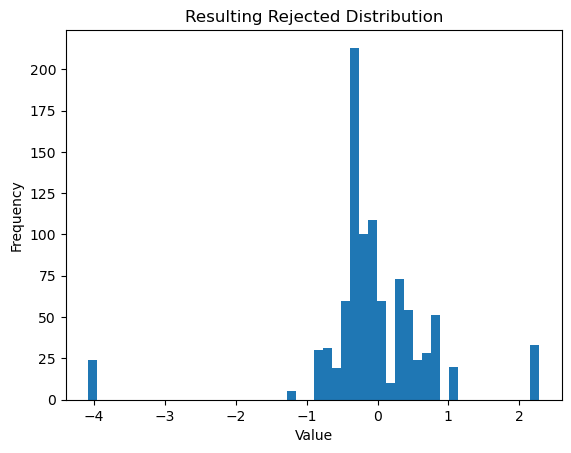

In [10]:
plt.hist(rejected[0],bins=50)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Resulting Rejected Distribution')

# 2d Metropolis Algorithm

Okay lets try to do this in two dimensions now.  At least we will still be able to visualize this in lower dimensions.  

Going to try and implement a 2-dim gaussian First I'll just naively implement it as $(x,y)$ and then do a histogram in the z-axis.  

In [73]:
def gauss_f_2dim(x,y):
    return gauss_f(x+y)
def dependent_y(X, c):
    n = len(X)
    Y = X.copy()
    for i in np.argwhere(abs(Y) <= c):
        Y[i] = -1*Y[i]
    return Y
def generate_X(n):
     np.random.rand(n)

In [70]:
n = 10
test = np.random.rand(n)
Y = dependent_y(test, 0.3) 
print(test.T, Y.T)
testloc = np.argwhere(abs(test) <= 0.3)
testloc

[0]
[0] [-0.26654519]
[1]
[1] [-0.28437237]
[5]
[5] [-0.20014895]
[0.26654519 0.28437237 0.80334852 0.51755656 0.84897422 0.20014895
 0.77996228 0.4731082  0.61397922 0.30344692] [-0.26654519 -0.28437237  0.80334852  0.51755656  0.84897422 -0.20014895
  0.77996228  0.4731082   0.61397922  0.30344692]


array([[0],
       [1],
       [5]])

In [88]:
n = 1000
test = np.random.rand(n)
Y = dependent_y(test, .7)
Xmat = np.column_stack((test, Y)).T
Xcorr = np.corrcoef(Xmat)
Xcorr

array([[1.        , 0.61157038],
       [0.61157038, 1.        ]])

In [80]:
Xcorr

array([[ 1., -1.],
       [-1.,  1.]])

In [87]:
1/1.4

0.7142857142857143